In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.formula.api as smf

from work.luther_code import read_pickle

%matplotlib inline

### By Player-Season

In [56]:
season_df = read_pickle('data/merged_data_df.pickle')
season_df = season_df[season_df['Total_Games_Played'] > 50].reset_index(drop=True)
season_df.drop(['Name', 'Birth_Date', 'Season', 'Team', 'Games_Played', 'Nationality',
                'Total_Games_Played'],
                axis=1,
                inplace=True)

In [57]:
season_df = pd.get_dummies(season_df, drop_first=True)

In [70]:
season_lm = smf.ols(('Games_Missed ~ Time_On_Ice + Points + Shots + Penalty_Minutes + '
                     'Major_Penalties + Penalties_Drawn + Hits + Hits_Taken + '
                     'Shots_Blocked + Height + Weight + European + Russian + Age + '
                     'Last_Games_Missed + Avg_Games_Missed + Position_D + Position_W'),
                    data=season_df)
season_fit = season_lm.fit()
season_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Games_Missed   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     25.50
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.81e-83
Time:                        01:02:53   Log-Likelihood:                -30425.
No. Observations:                7851   AIC:                         6.089e+04
Df Residuals:                    7832   BIC:                         6.102e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.3728      5.426     -1.175      0.240     -17.009       4.263
Time_On_Ice          -0.0097      0.062     -0.157      0.875      -0.131       0.112
Points               -1.2902      0.965     -1.338      0.181      -3.181       0.601
Shots                 0.2356      0.309      0.763      0.445      -0.369       0.840
Penalty_Minutes       0.1680      0.415      0.405      0.686      -0.645       0.981
Major_Penalties      -4.2606      4.047     -1.053      0.293     -12.195       3.673
Penalties_Drawn       5.6963      1.258      4.529      0.000       3.231       8.162
Hits                  0.2873      0.204      1.410      0.159      -0.112       0.687
Hits_Taken            0.2201      0.300      0.733      0.464      -0.369       0.809
Shots_Blocked         0.1775      0.444      0.400      0.689      -0.694       1.049
Height                0.1219      0.093      1.310      0.190      -0.060       0.304
Weight               -0.0239      0.014     -1.763      0.078      -0.051       0.003
European              0.7927      0.336      2.361      0.018       0.135       1.451
Russian               0.8487      0.741      1.145      0.252      -0.604       2.302
Age                   0.1907      0.032      5.987      0.000       0.128       0.253
Last_Games_Missed     0.0747      0.015      4.922      0.000       0.045       0.104
Avg_Games_Missed      0.2433      0.026      9.379      0.000       0.192       0.294
Position_D            1.0299      0.518      1.988      0.047       0.014       2.045
Position_W            0.0612      0.345      0.178      0.859      -0.614       0.736
==============================================================================
Omnibus:                     4455.248   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36789.872
Skew:                           2.658   Prob(JB):                         0.00
Kurtosis:                      12.176   Cond. No.                     9.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
season_df.corr()

,Time_On_Ice,Points,Shots,Penalty_Minutes,Major_Penalties,Penalties_Drawn,Hits,Hits_Taken,Shots_Blocked,Height,Weight,European,Russian,Age,Last_Games_Missed,Avg_Games_Missed,Games_Missed,Position_D,Position_W
Time_On_Ice,1.000000,0.553504,0.568798,-0.055501,-0.259708,0.064711,0.052347,0.405913,0.605626,0.058184,0.036799,0.097988,0.031962,0.093650,0.066228,0.083001,0.051670,0.430676,-0.286667
Points,0.553504,1.000000,0.790449,-0.080996,-0.206820,0.239419,-0.170449,0.055243,-0.085150,-0.112850,-0.121882,0.092796,0.069674,0.012635,0.009384,0.039442,0.000781,-0.244308,0.118431
Shots,0.568798,0.790449,1.000000,-0.072577,-0.213942,0.253949,-0.048886,0.130343,-0.060227,-0.089790,-0.075444,0.075329,0.039023,-0.024489,0.019056,0.041695,0.011964,-0.222410,0.169984
Penalty_Minutes,-0.055501,-0.080996,-0.072577,1.000000,0.778528,0.519672,0.360436,0.074112,0.008944,0.186240,0.278248,-0.126430,-0.040260,0.097535,0.040599,0.066046,0.047750,0.003241,0.113536
Major_Penalties,-0.259708,-0.206820,-0.213942,0.778528,1.000000,0.484325,0.277551,-0.032242,-0.090067,0.144226,0.226473,-0.152562,-0.058615,0.046868,0.002657,0.015450,0.021031,-0.076813,0.160092
Penalties_Drawn,0.064711,0.239419,0.253949,0.519672,0.484325,1.000000,0.257199,0.136203,-0.147915,-0.051085,0.018092,-0.071424,-0.005632,-0.058557,0.015564,0.039407,0.053704,-0.262606,0.227383
Hits,0.052347,-0.170449,-0.048886,0.360436,0.277551,0.257199,1.000000,0.296721,0.174693,0.203442,0.353077,-0.120305,-0.038139,0.007933,0.020528,0.028275,0.040800,0.063034,0.061442
Hits_Taken,0.405913,0.055243,0.130343,0.074112,-0.032242,0.136203,0.296721,1.000000,0.392552,0.058390,0.041699,0.037920,-0.018117,-0.114400,0.011836,-0.009919,0.032339,0.301889,-0.117442
Shots_Blocked,0.605626,-0.085150,-0.060227,0.008944,-0.090067,-0.147915,0.174693,0.392552,1.000000,0.169467,0.165598,0.008782,-0.024383,0.108374,0.071738,0.083218,0.059244,0.765518,-0.481310
Height,0.058184,-0.112850,-0.089790,0.186240,0.144226,-0.051085,0.203442,0.058390,0.169467,1.000000,0.723300,0.015623,0.018523,-0.012796,0.008864,0.005200,0.011458,0.216867,-0.106172


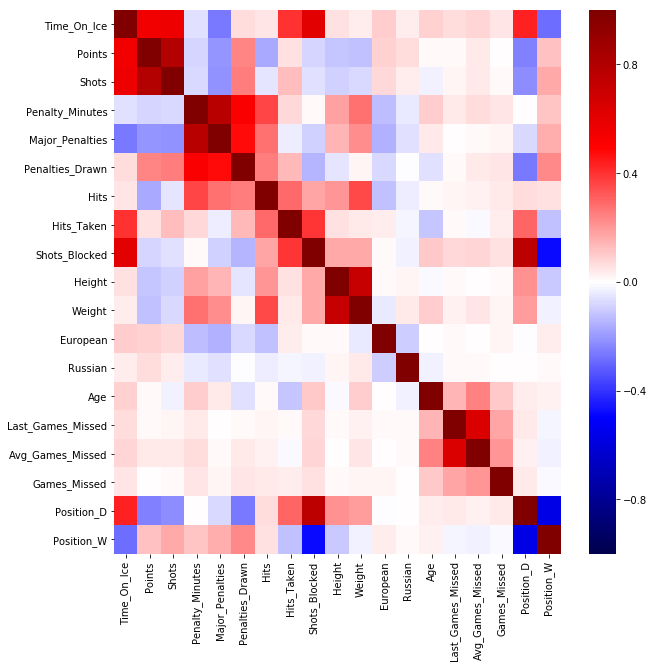

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(season_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

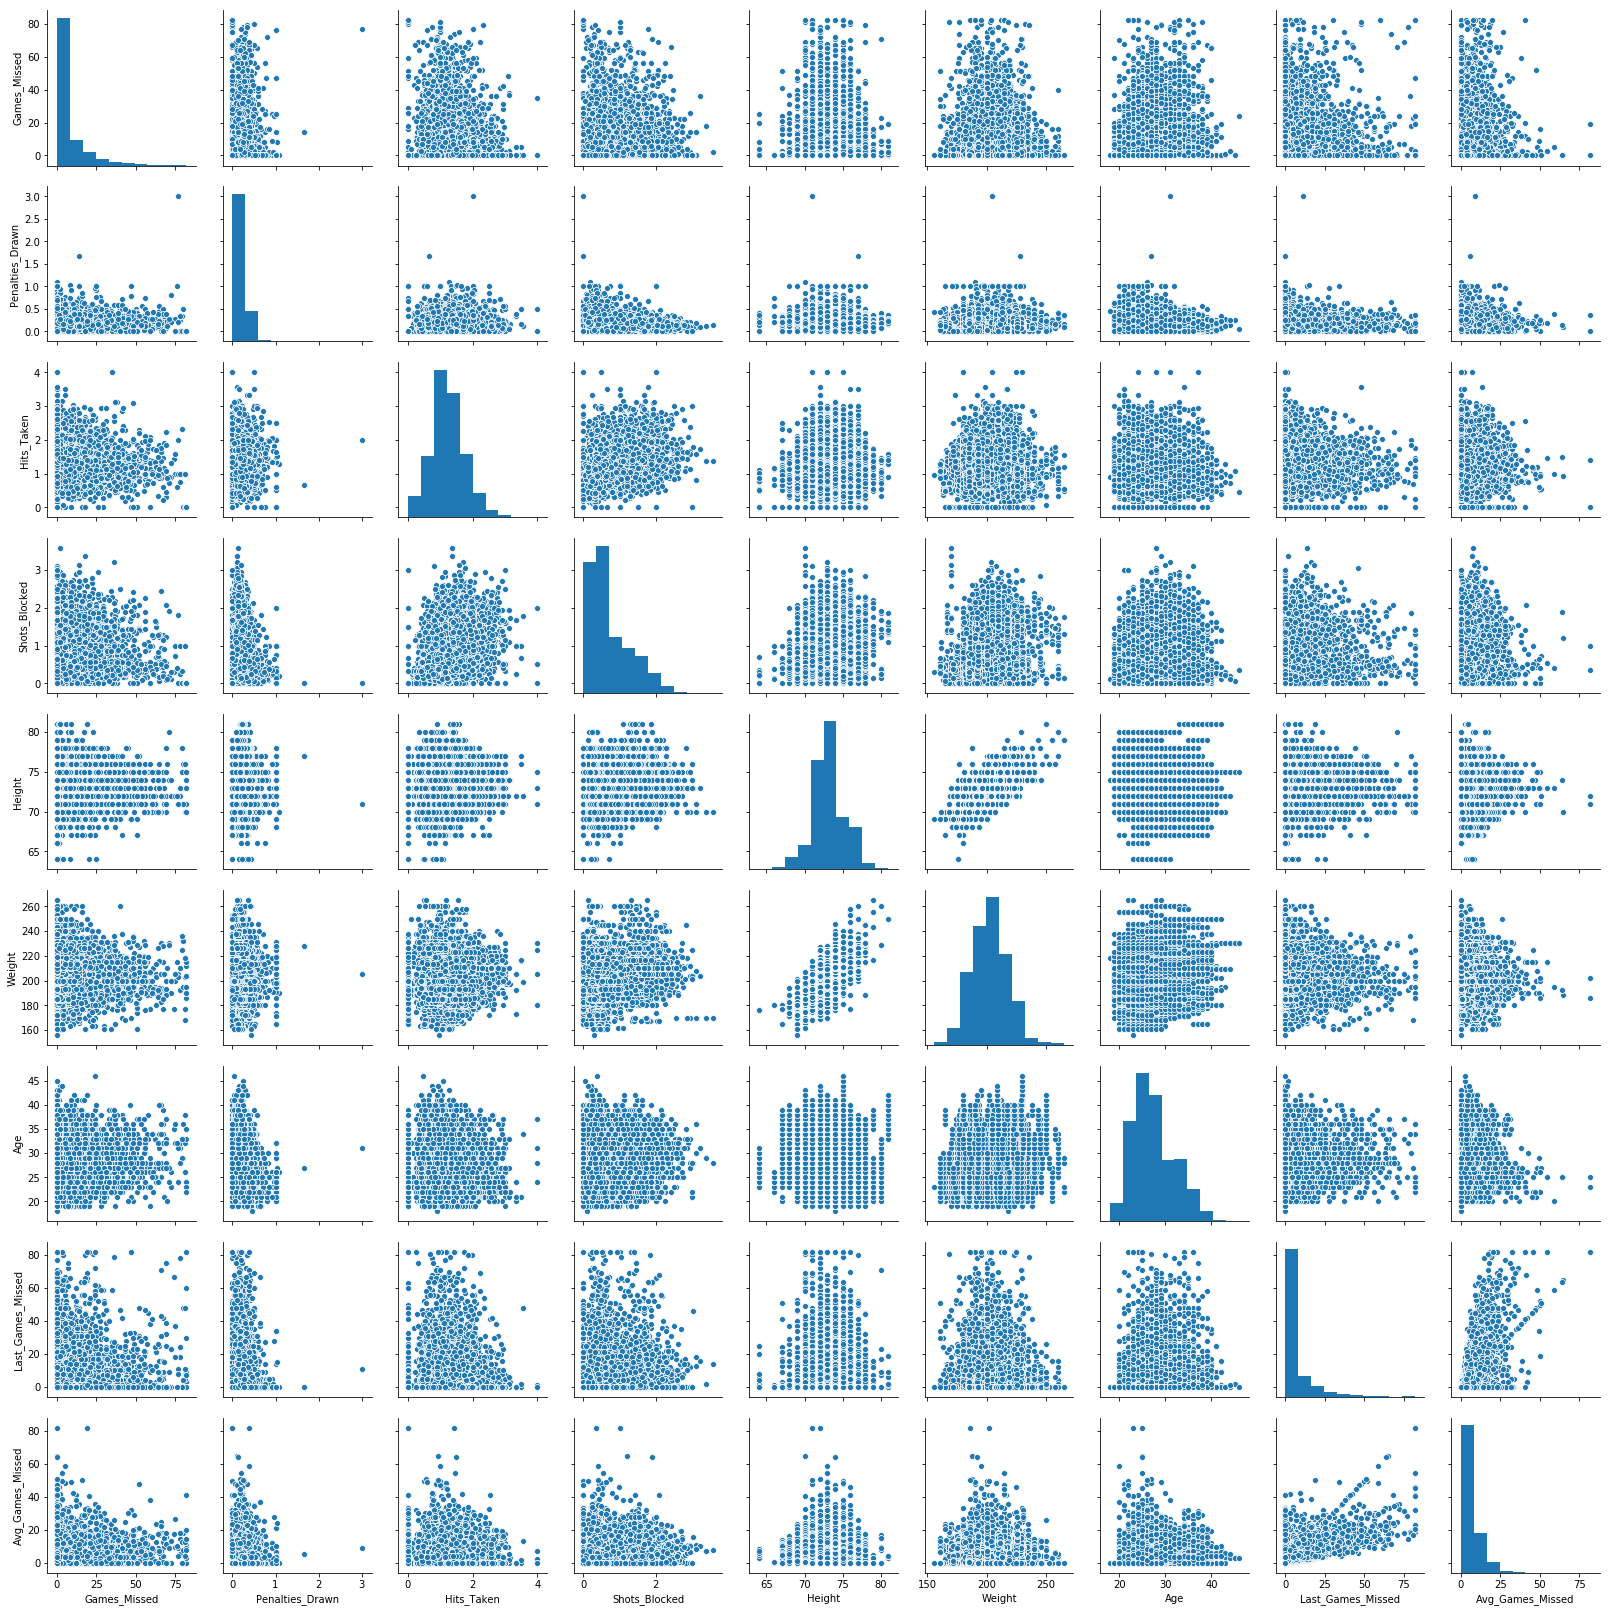

In [28]:
df_plot = season_df[['Games_Missed', 'Penalties_Drawn', 'Hits_Taken', 'Shots_Blocked', 'Height',
                     'Weight', 'Age', 'Last_Games_Missed', 'Avg_Games_Missed']]
sns.pairplot(df_plot);

### By Player

In [62]:
player_df = read_pickle('data/merged_by_player_df.pickle')
player_df = player_df[player_df['Games_Played'] > 50].reset_index(drop=True)
player_df.drop(['Name', 'Birth_Date', 'Nationality'], axis=1, inplace=True)

In [64]:
player_df = pd.get_dummies(player_df, drop_first=True)

In [72]:
player_lm = smf.ols(('Games_Missed ~ Time_On_Ice + Points + Shots + Penalty_Minutes + '
                     'Major_Penalties + Penalties_Drawn + Hits + Hits_Taken + '
                     'Shots_Blocked + Height + Weight + European + Russian + '
                     'Position_D + Position_W'), data=player_df)
player_fit = player_lm.fit()
player_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Games_Missed   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.412
Date:                Wed, 17 Apr 2019   Prob (F-statistic):            0.00184
Time:                        01:08:20   Log-Likelihood:                 1151.8
No. Observations:                1396   AIC:                            -2272.
Df Residuals:                    1380   BIC:                            -2188.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1301      0.116      1.119      0.263      -0.098       0.358
Time_On_Ice        -0.0035      0.002     -1.598      0.110      -0.008       0.001
Points              0.0014      0.037      0.037      0.970      -0.070       0.073
Shots              -0.0023      0.009     -0.240      0.810      -0.021       0.016
Penalty_Minutes     0.0111      0.017      0.646      0.518      -0.023       0.045
Major_Penalties    -0.1748      0.146     -1.201      0.230      -0.460       0.111
Penalties_Drawn     0.0731      0.052      1.413      0.158      -0.028       0.174
Hits                0.0027      0.006      0.471      0.638      -0.008       0.014
Hits_Taken          0.0109      0.009      1.244      0.214      -0.006       0.028
Shots_Blocked       0.0178      0.014      1.304      0.192      -0.009       0.045
Height             -0.0002      0.002     -0.094      0.925      -0.004       0.004
Weight          -1.555e-05      0.000     -0.053      0.957      -0.001       0.001
European           -0.0020      0.007     -0.278      0.781      -0.016       0.012
Russian            -0.0086      0.015     -0.574      0.566      -0.038       0.021
Position_D          0.0201      0.015      1.323      0.186      -0.010       0.050
Position_W         -0.0035      0.008     -0.461      0.645      -0.018       0.011
==============================================================================
Omnibus:                      364.307   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.881
Skew:                           1.417   Prob(JB):                    4.24e-188
Kurtosis:                       5.608   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
player_df.corr()

,Games_Played,Time_On_Ice,Points,Shots,Penalty_Minutes,Major_Penalties,Penalties_Drawn,Hits,Hits_Taken,Shots_Blocked,Games_Missed,Height,Weight,European,Russian,Position_D,Position_W
Games_Played,1.000000,0.495517,0.476973,0.450027,0.009219,-0.095479,0.149252,0.054123,0.112046,0.139636,-0.041860,0.028529,0.085548,-0.000827,-0.036809,0.001229,-0.010067
Time_On_Ice,0.495517,1.000000,0.501106,0.468610,-0.259208,-0.451329,-0.213595,-0.145232,0.301422,0.630263,-0.003677,0.043987,0.004326,0.097741,0.070001,0.576701,-0.383280
Points,0.476973,0.501106,1.000000,0.854306,-0.234158,-0.336461,0.204220,-0.353470,-0.098041,-0.220101,-0.100382,-0.181127,-0.199583,0.092341,0.103381,-0.282065,0.148840
Shots,0.450027,0.468610,0.854306,1.000000,-0.248478,-0.361298,0.182201,-0.234016,-0.043706,-0.212589,-0.091829,-0.159074,-0.145223,0.081409,0.068197,-0.254457,0.202311
Penalty_Minutes,0.009219,-0.259208,-0.234158,-0.248478,1.000000,0.882331,0.622202,0.432470,-0.039554,-0.019325,0.056454,0.251409,0.376415,-0.172716,-0.047573,0.019013,0.149677
Major_Penalties,-0.095479,-0.451329,-0.336461,-0.361298,0.882331,1.000000,0.553793,0.352606,-0.112034,-0.131831,0.039405,0.201814,0.301109,-0.193407,-0.076301,-0.089957,0.199174
Penalties_Drawn,0.149252,-0.213595,0.204220,0.182201,0.622202,0.553793,1.000000,0.258311,-0.001237,-0.333858,0.014143,-0.086911,0.005763,-0.134707,-0.008364,-0.386065,0.347243
Hits,0.054123,-0.145232,-0.353470,-0.234016,0.432470,0.352606,0.258311,1.000000,0.269124,0.150189,0.076894,0.250374,0.407726,-0.148664,-0.033630,0.088160,0.076166
Hits_Taken,0.112046,0.301422,-0.098041,-0.043706,-0.039554,-0.112034,-0.001237,0.269124,1.000000,0.438876,0.089730,0.062507,0.019185,0.022834,-0.016972,0.400248,-0.160945
Shots_Blocked,0.139636,0.630263,-0.220101,-0.212589,-0.019325,-0.131831,-0.333858,0.150189,0.438876,1.000000,0.100150,0.210419,0.184346,0.003315,-0.025717,0.867044,-0.552739


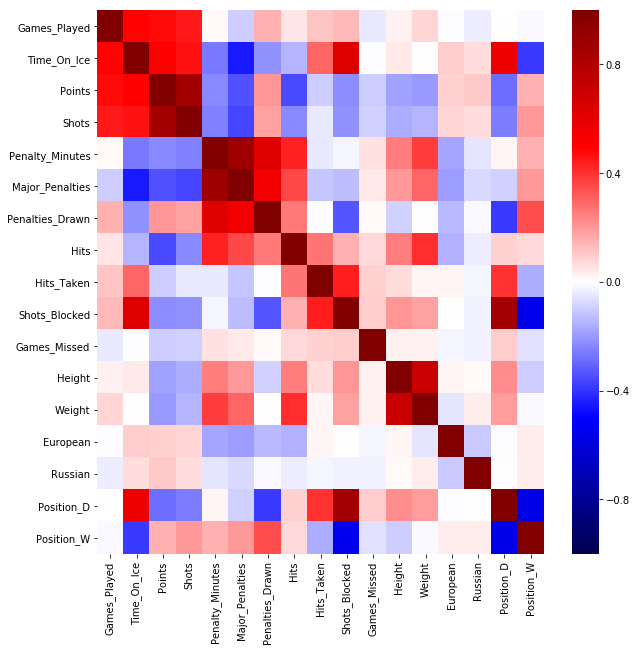

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(player_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

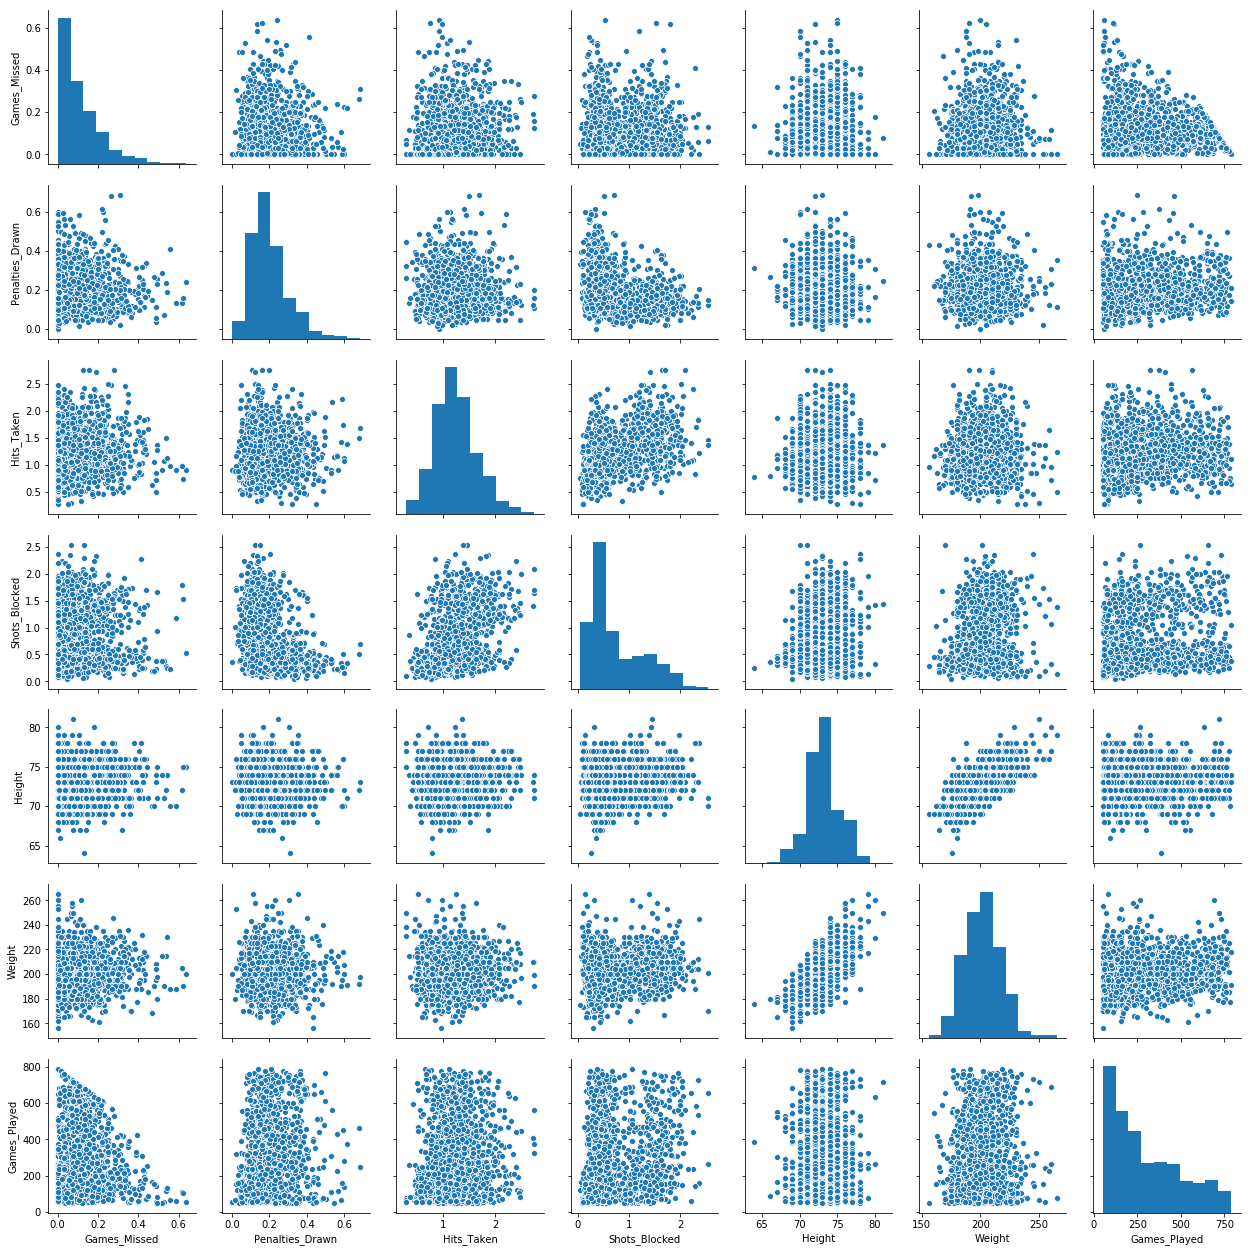

In [31]:
df_plot = player_df[['Games_Missed', 'Penalties_Drawn', 'Hits_Taken', 'Shots_Blocked', 'Height',
                     'Weight', 'Games_Played']]
sns.pairplot(df_plot);